### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
#Install latest version of tensorflow
! pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 46.9MB/s 
     |████████████████████████████████| 450kB 61.6MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
#Import tensorflow
import tensorflow as tf

In [3]:
#Print the the tensorflow version
tf.__version__

'2.1.0'

### Collect Data

In [0]:
#Import keras from tensorflow
from tensorflow import keras

In [5]:
#Import Fashion MNIST dataset from the Keras datasets
(trainX, testX), (trainY, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
#Print the first 5 values of the testY
print(testY[0:5])

[9 2 1 1 6]


In [0]:
#Normalize the trainX and trainY data
trainX = trainX / 255
trainY = trainY / 255

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
#Convert the testX values categorical values
testX = tf.keras.utils.to_categorical(testX, 10, int)

In [0]:
#Convert the testY values categorical values
testY = tf.keras.utils.to_categorical(testY, 10, int)

In [10]:
#Print the values
print(testX)
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000, 28, 28)
First 5 examples now are:  [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Visualize the data

Plot first 10 images in the training set and their labels.

In [0]:
#Import matplotlib for visualization
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


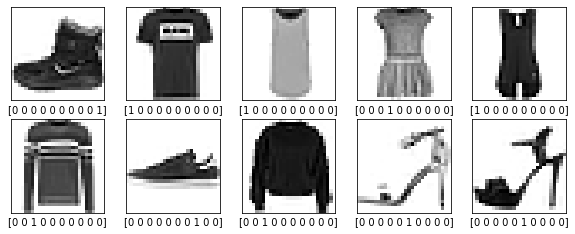

In [12]:
#Print the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(testX[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    tf.keras.layers.Flatten(input_shape = (28,28)),
                    tf.keras.layers.Dense(128),
                    tf.keras.layers.Dense(10 , activation= 'softmax')
])

In [0]:
#model.add(Dense(10, activation='softmax', keras.layers.Flatten(input_shape=(28,28))))


In [0]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
#Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [16]:
#Fit the model and train
history = model.fit(trainX, testX, batch_size=1, verbose=True)

Train on 60000 samples
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.5778 - accuracy: 0.7994


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [17]:
#Add a Batch normalization layer
from keras.layers import BatchNormalization

batch = tf.keras.layers.BatchNormalization()

model = Sequential([
                    tf.keras.layers.Flatten(input_shape = (28,28)),
                    batch,
                    tf.keras.layers.Dense(128),
                    tf.keras.layers.Dense(10 , activation= 'softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


Using TensorFlow backend.


### Execute the model

In [18]:
#Run the model with Batch Normalization layer
history = model.fit(trainX, testX, batch_size=1, verbose=True)

Train on 60000 samples
60000/60000 [==============================] - 140s 2ms/sample - loss: 2.3098 - accuracy: 0.0989


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [19]:
#Customize learning rate to 0.001 to sgd optimizer

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


In [20]:
#Fit the model
history = model.fit(trainX, testX, batch_size=1, verbose=True)

Train on 60000 samples
60000/60000 [==============================] - 141s 2ms/sample - loss: 2.3033 - accuracy: 0.0996


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [21]:
#Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. 
#Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. 
#Use sgd optimizer with learning rate 0.03.
model = Sequential([
                    tf.keras.layers.Flatten(input_shape = (28,28)),
                    tf.keras.layers.Dense(100, activation = 'sigmoid'),
                    tf.keras.layers.Dense(100, activation = 'sigmoid'),
                    tf.keras.layers.Dense(10 , activation= 'softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(trainX, testX, batch_size=1, epochs = 5, verbose=True)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.5641 - accuracy: 0.7901
Epoch 2/5
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.4022 - accuracy: 0.8513
Epoch 3/5
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.3620 - accuracy: 0.8654
Epoch 4/5
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.3393 - accuracy: 0.8740
Epoch 5/5
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.3211 - accuracy: 0.8813


## Review model

In [24]:
test_loss, test_acc = model.evaluate(trainY,  testY, verbose=2)


10000/10000 - 1s - loss: 0.3692 - accuracy: 0.8664


### Run the model

In [25]:
print(test_loss)
print(test_acc)

0.3691780198574066
0.8664


In [26]:
history = model.fit(trainX, testX, batch_size=1, epochs = 5, verbose=True)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.3088 - accuracy: 0.8854
Epoch 2/5
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.2972 - accuracy: 0.8888
Epoch 3/5
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.2870 - accuracy: 0.8929
Epoch 4/5
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.2770 - accuracy: 0.8946
Epoch 5/5
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.2695 - accuracy: 0.8982
